# Belief in Supernatural Evil and Guns

---
> Author: Georgios Zachariadis


## Belief in Supernatural Evil Metric

In order to measure the belief in supernatural evil, we will use the answers to three questions asked by the participants in the survey:

* Whether the respondent believes in the devil.

* Whether the respondent believes in hell.

* Whether the respondent believes in demons.

We will investigate how the answers to these three questions can be combined to a single metric.

### First of all let's import our modules and read our dataset.

In [1]:
import pandas as pd
import os

dataset_path = 'datasets/BRS.XLSX'
df = pd.read_excel(dataset_path)

### Run some summary of our dataframe

In [2]:
print("Shape:",df.shape)
print("NaN values in dataset:",df.isna().sum())

Shape: (1572, 282)
NaN values in dataset: MOTHERLODE_ID     0
PROJECT_ID        0
RESPONDENT_ID     0
METHOD_ID         0
METHOD_TYPE       0
                 ..
I_GENDER         36
I_EDUC           71
I_MARITAL        18
I_RELIGION       91
I_ATTEND         16
Length: 282, dtype: int64


### As the paper mention Supernatural Metric can be measured by summing answers in DEVIL, HELL, DEMON related questions. Below I'm trying to handle our data more clearly.

In [3]:
from pprint import pprint
column_names = df.columns

DEVIL_QUESTION = df['Q23A']
HELL_QUESTION = df['Q23C']
DEMONS_QUESTION = df['Q23G']

print("Missing valus in DEVIL_QUESTION:", DEVIL_QUESTION.isna().sum())
print("Missing valus in HELL_QUESTION:", HELL_QUESTION.isna().sum())
print("Missing valus in DEMONS_QUESTION:", DEMONS_QUESTION.isna().sum())

ANSWERS = {1:'Absolutely not',
          2:'Probably not',
          3:'Probably',
          4:'Absolutely'}

Missing valus in DEVIL_QUESTION: 68
Missing valus in HELL_QUESTION: 73
Missing valus in DEMONS_QUESTION: 80


In [4]:
# Display all answers in the corresponding questions
dev_absolutely_not = (DEVIL_QUESTION==1.0)
dev_probably_not = (DEVIL_QUESTION==2.0)
dev_probably = (DEVIL_QUESTION==3.0)
dev_absolutely = (DEVIL_QUESTION==4.0)

print(f"DEVIL_QUESTION ANSWERS ({DEVIL_QUESTION.shape[0]})") 
print(ANSWERS[1],":", dev_absolutely_not.sum())
print(ANSWERS[2],":", dev_probably_not.sum())
print(ANSWERS[3],":", dev_probably.sum())
print(ANSWERS[4],":", dev_absolutely.sum())

hell_absolutely_not = (HELL_QUESTION==1.0)
hell_probably_not = (HELL_QUESTION==2.0)
hell_probably = (HELL_QUESTION==3.0)
hell_absolutely = (HELL_QUESTION==4.0)

print(f"\n\nHELL_QUESTION ANSWERS ({HELL_QUESTION.shape[0]})")
print(ANSWERS[1],":", hell_absolutely_not.sum())
print(ANSWERS[2],":", hell_probably_not.sum())
print(ANSWERS[3],":", hell_probably.sum())
print(ANSWERS[4],":", hell_absolutely.sum())

demon_absolutely_not = (DEMONS_QUESTION==1.0)
demon_probably_not = (DEMONS_QUESTION==2.0)
demon_probably = (DEMONS_QUESTION==3.0)
demon_absolutely = (DEMONS_QUESTION==4.0)

print(f"\n\nDEMON_QUESTION ANSWERS ({DEMONS_QUESTION.shape[0]})")
print(ANSWERS[1],":", demon_absolutely_not.sum())
print(ANSWERS[2],":", demon_probably_not.sum())
print(ANSWERS[3],":", demon_probably.sum())
print(ANSWERS[4],":", demon_absolutely.sum())

summation ={ 1: dev_absolutely_not.sum() + hell_absolutely_not.sum() + demon_absolutely_not.sum(),
           2: dev_probably_not.sum() + hell_probably_not.sum() + demon_probably_not.sum(), 
           3: dev_probably.sum() + hell_probably.sum() + demon_probably.sum(), 
           4: dev_absolutely.sum() + hell_absolutely.sum() + demon_absolutely.sum()}

DEVIL_QUESTION ANSWERS (1572)
Absolutely not : 213
Probably not : 188
Probably : 264
Absolutely : 839


HELL_QUESTION ANSWERS (1572)
Absolutely not : 217
Probably not : 219
Probably : 277
Absolutely : 786


DEMON_QUESTION ANSWERS (1572)
Absolutely not : 224
Probably not : 232
Probably : 332
Absolutely : 704


### We combine these 3 questions in a new dataframe with 4 columns, where in the 4th column we are going to save the mean of the 3 answers replied by each user. So the first row corresponds to the first user, the second row to the second user and so on. The 4th column indicates the strength of belief in supernatural evil. This index ranges from 1 to 4  (4 = absolutely, 3 = probably, 2 = probably not, and 1 = definitely not) with a mean of 3.09, indicating significant levels of overall belief in supernatural evil among the BRS respondents.

In [5]:
lis = {'DEVIL':DEVIL_QUESTION, 'HELL':HELL_QUESTION, 'DEMONS':DEMONS_QUESTION}
SUPERNATURAL_EVIL_SUMMATION = pd.DataFrame(data=lis)
SUPERNATURAL_EVIL_SUMMATION['AVERAGE'] = SUPERNATURAL_EVIL_SUMMATION.mean(numeric_only=True, axis=1)
print("Overall belief in supernatural evil:",round(SUPERNATURAL_EVIL_SUMMATION.AVERAGE.mean(),2))

Overall belief in supernatural evil: 3.09


## Variables Selection

Apart from the belief in supernatural evil metric, we will use several other variables to control your estimates. The variables are (see Appendix A of the original publication):

* Dependent Variables

  * Ban on Semi-Auto Guns
  * Ban on High-Capacity Ammo Clips 
  * Banning Civilian Handguns
  * Support for Concealed Carry Laws 
  * More Armed Security at Schools 
  * More Teachers/Faculty having Guns 
  * More Gun Safety Programs 
  * Expanded Mental Health Screening
  
* Independept Variables
 
   * Religious Variables
     * Attendance
     * Bible (Human Error, History and Fables) 
     * Biblical Inerrancy
     * Biblical Literalism
     
  * Religious Affiliation
    * Conservative Protestant 
    * Mainline Protestant 
    * Black Protestant 
    * Catholic
    * Other
    * No Affiliation
  * Political Ideology
  * Age
  * Sex
    * Female
    * Male
  * Race
    * White
    * Hispanic
    * African American/Black 
    * Other
  * Education
    * Less Than High School 
    * High School or Equivalent 
    * Some College
    * College Degree 
    * Post-graduate Degree 
  * Household Income
  * Marital Status
    * Not Partnered/Single 
    * Married/Cohabitating
  * Children
    * No kids under 18 in home 
    * Kids under 18 in home
  * Area Demographics
    * Small Town/Rural
    * Urban Area
  * Region
    * South
    * Other Region
    
We will derive descriptive statistics of your variables and encode them with dummy variables where needed.

### I observe the fact that there are respondents with AGE = 0. So we are going to clean our data by taking only respondents with their AGE>0. (the dataset consists of many variables, so sorry for the bad code structure). Each one variable is linked with corresponding question taken by BRS analysis.

In [6]:
dataset_path = 'datasets/BRS.XLSX'
df = pd.read_excel(dataset_path)
df = df[df['AGE']>0]

# DEPENDENT VARIABLES

BAN_SEMI_AUTO = df['Q73A']
BAN_HIGH_CAPACITY =df['Q73E']
BAN_CIVILIAN = df['Q73G']
SUPPORT_CONCEALED = df['Q73H']
MORE_SECURITY_SCHOOLS = df['Q73C']
TEACHER_HAVE_GUNS = df['Q73F']
MORE_SAFETY_PROGRAMS = df['Q73B']
MENTAL_HEALTH_SCREENING = df['Q73D']

# INDEPENDENT VARIABLES

# Religious Variables
BIBLE = (df['Q17']==3) | (df['Q17']==4)
BIBLICAL_LITER = df['Q17']==1
BIBLICAL_INER = df['Q17']==2
ATTENDANCE = df['Q4']

# Religious Affiliation
RELIGIOUS_AFFILIATION = df['RELTRAD']

# Sex
SEX = df['I_GENDER']

# Age
AGE = df['AGE']

# Political Ideology
POLITCAL_IDEOLOGY = df['Q31']

# Race
WHITE_RACE = df['Q88A']==1
AFRICAN_AMERICAN_RACE = df['Q88B']==1
HISPANIC_RACE = (df['Q89']==2) | (df['Q89']==3) | (df['Q89']==4) | (df['Q89']==5) # 6 choices where (1) I am not Hispanic and (8) I don't know
OTHER_RACE = (df['Q88F']==1) | (df['Q88C']==1) | (df['Q88D']==1) | (df['Q88E']==1) # Take every other race as OTHER_RACE

# Education
EDUCATION = df['I_EDUC']

# Household Income
HOUSEHOLD_ICOME = df['Q95']

# Marital Status
MARITAL_STATUS = df['I_MARITAL']

# Children
NO_CHILDREN_UNDER_18 = (df['Q93'].isna()) | (df['Q93']==0) # we assign an the NaN values as no children under 18 in question
CHILDREN_UNDER_18 = df['Q93']>0
HAVE_CHILDREN = df['Q55']==1

# Area Demographics
AREA_DEMOGRAPHICS = df['Q80']
SMALL_TOWN = (AREA_DEMOGRAPHICS==3) | (AREA_DEMOGRAPHICS==4) # (3) small town and (4) rural area
URBAN_AREA = (AREA_DEMOGRAPHICS==1) | (AREA_DEMOGRAPHICS==2) # (1) large city and (2) suburb near a large city


# Region
REGION = df['STATE']

### For better handling US states' data we are going to download a module which is related with US information.

In [7]:
!pip install us

In [8]:
import us
import numpy as np

# save all states and map them with abbreviation names
STATES = us.states.mapping('abbr', 'name')
# initialize SOUTHERN_STATES by our own
SOUTHERN_STATES = ["Alabama","Arkansas","Delaware","Florida","Georgia","Kentucky","Louisiana","Maryland","Mississippi",
                   "North Carolina","Oklahoma","South Carolina","Tennessee","Texas","Virginia","West Virginia"]
south_list = []
for key, value in STATES.items():
    if value in SOUTHERN_STATES:
        south_list.append(key)

# map the southern list with our dataframe
SOUTH = REGION.loc[REGION.isin(south_list)]
OTHER_REGION = REGION.loc[~REGION.isin(south_list)]

boolean_south = []
for item in REGION:
    if item in south_list:
        boolean_south.append(True)
    else:
        boolean_south.append(False)

# make a new column for better reading and handling our data, 
# where it has True whenever a respondent lives in South US
df['IS_SOUTH'] = boolean_south

### Below we are making specific dummies-encoded data for some variables as shown in Appendix A of the research paper. Furthermore, for each variable we calculate its variable range and mean.

In [9]:
# Dependent Variables dummy
BAN_SEMI_AUTO_dummy=BAN_SEMI_AUTO-1
BAN_SEMI_AUTO_dummy = BAN_SEMI_AUTO_dummy.replace({0:1, 1:0})
BAN_SEMI_AUTO_range = [int(BAN_SEMI_AUTO_dummy.min()), int(BAN_SEMI_AUTO_dummy.max())]
BAN_SEMI_AUTO_mean = BAN_SEMI_AUTO_dummy.mean()

BAN_HIGH_CAPACITY_dummy= BAN_HIGH_CAPACITY-1
BAN_HIGH_CAPACITY_dummy = BAN_HIGH_CAPACITY_dummy.replace({0:1, 1:0})
BAN_HIGH_CAPACITY_range = [int(BAN_HIGH_CAPACITY_dummy.min()), int(BAN_HIGH_CAPACITY_dummy.max())]
BAN_HIGH_CAPACITY_mean = BAN_HIGH_CAPACITY_dummy.mean()

BAN_CIVILIAN_dummy= BAN_CIVILIAN-1
BAN_CIVILIAN_dummy = BAN_CIVILIAN_dummy.replace({0:1, 1:0})
BAN_CIVILIAN_range = [int(BAN_CIVILIAN_dummy.min()), int(BAN_CIVILIAN_dummy.max())]
BAN_CIVILIAN_mean = BAN_CIVILIAN_dummy.mean()

SUPPORT_CONCEALED_dummy= SUPPORT_CONCEALED-1
SUPPORT_CONCEALED_dummy = SUPPORT_CONCEALED_dummy.replace({0:1, 1:0})
SUPPORT_CONCEALED_range = [int(SUPPORT_CONCEALED_dummy.min()), int(SUPPORT_CONCEALED_dummy.max())]
SUPPORT_CONCEALED_mean = SUPPORT_CONCEALED_dummy.mean()

MORE_SECURITY_SCHOOLS_dummy= MORE_SECURITY_SCHOOLS-1
MORE_SECURITY_SCHOOLS_dummy = MORE_SECURITY_SCHOOLS_dummy.replace({0:1, 1:0})
MORE_SECURITY_SCHOOLS_range = [int(MORE_SECURITY_SCHOOLS_dummy.min()), int(MORE_SECURITY_SCHOOLS_dummy.max())]
MORE_SECURITY_SCHOOLS_mean = MORE_SECURITY_SCHOOLS_dummy.mean()

TEACHER_HAVE_GUNS_dummy= TEACHER_HAVE_GUNS-1
TEACHER_HAVE_GUNS_dummy = TEACHER_HAVE_GUNS_dummy.replace({0:1, 1:0})
TEACHER_HAVE_GUNS_range = [int(TEACHER_HAVE_GUNS_dummy.min()), int(TEACHER_HAVE_GUNS_dummy.max())]
TEACHER_HAVE_GUNS_mean = TEACHER_HAVE_GUNS_dummy.mean()

MORE_SAFETY_PROGRAMS_dummy= MORE_SAFETY_PROGRAMS-1
MORE_SAFETY_PROGRAMS_dummy = MORE_SAFETY_PROGRAMS_dummy.replace({0:1, 1:0})
MORE_SAFETY_PROGRAMS_range = [int(MORE_SAFETY_PROGRAMS_dummy.min()), int(MORE_SAFETY_PROGRAMS_dummy.max())]
MORE_SAFETY_PROGRAMS_mean = MORE_SAFETY_PROGRAMS_dummy.mean()

MENTAL_HEALTH_SCREENING_dummy= MENTAL_HEALTH_SCREENING-1
MENTAL_HEALTH_SCREENING_dummy = MENTAL_HEALTH_SCREENING_dummy.replace({0:1, 1:0})
MENTAL_HEALTH_SCREENING_range = [int(MENTAL_HEALTH_SCREENING_dummy.min()), int(MENTAL_HEALTH_SCREENING_dummy.max())]
MENTAL_HEALTH_SCREENING_mean = MENTAL_HEALTH_SCREENING_dummy.mean()

# Religious Variables dummy
BIBLE_dummy = BIBLE.replace({False:0, True:1})
BIBLE_range = [int(BIBLE_dummy.min()), int(BIBLE_dummy.max())]
BIBLE_mean = BIBLE_dummy.mean()

BIBLICAL_LITER_dummy = BIBLICAL_LITER.replace({False:0, True:1})
BIBLICAL_LITER_range = [int(BIBLICAL_LITER_dummy.min()), int(BIBLICAL_LITER_dummy.max())]
BIBLICAL_LITER_mean = BIBLICAL_LITER_dummy.mean()

BIBLICAL_INER_dummy = BIBLICAL_INER.replace({False:0, True:1})
BIBLICAL_INER_range = [int(BIBLICAL_INER_dummy.min()), int(BIBLICAL_INER_dummy.max())]
BIBLICAL_INER_mean = BIBLICAL_INER_dummy.mean()

# Religious Affiliation
EUANGELICAL_PROTESTANT_dummy = (RELIGIOUS_AFFILIATION==1).replace({False:0, True:1})
EUANGELICAL_PROTESTANT_range = [int(EUANGELICAL_PROTESTANT_dummy.min()), int(EUANGELICAL_PROTESTANT_dummy.max())]
EUANGELICAL_PROTESTANT_mean = EUANGELICAL_PROTESTANT_dummy.mean()

MAINLINE_PROTESTANT_dummy = (RELIGIOUS_AFFILIATION==2).replace({False:0, True:1})
MAINLINE_PROTESTANT_range = [int(MAINLINE_PROTESTANT_dummy.min()), int(MAINLINE_PROTESTANT_dummy.max())]
MAINLINE_PROTESTANT_mean = MAINLINE_PROTESTANT_dummy.mean()

BLACK_PROTESTANT_dummy = (RELIGIOUS_AFFILIATION==3).replace({False:0, True:1})
BLACK_PROTESTANT_range = [int(BLACK_PROTESTANT_dummy.min()), int(BLACK_PROTESTANT_dummy.max())]
BLACK_PROTESTANT_mean = BLACK_PROTESTANT_dummy.mean()

CATHOLIC_dummy = (RELIGIOUS_AFFILIATION==4).replace({False:0, True:1})
CATHOLIC_range = [int(CATHOLIC_dummy.min()), int(CATHOLIC_dummy.max())]
CATHOLIC_mean = CATHOLIC_dummy.mean()

OTHER_dummy = (RELIGIOUS_AFFILIATION==6).replace({False:0, True:1})
OTHER_range = [int(OTHER_dummy.min()), int(OTHER_dummy.max())]
OTHER_mean = OTHER_dummy.mean()

NO_AFFILIATION_dummy = (RELIGIOUS_AFFILIATION==7).replace({False:0, True:1})
NO_AFFILIATION_range = [int(NO_AFFILIATION_dummy.min()), int(NO_AFFILIATION_dummy.max())]
NO_AFFILIATION_mean = NO_AFFILIATION_dummy.mean()


# Sex
MALE_dummy = (SEX==1).replace({False:0, True:1})
MALE_range = [int(MALE_dummy.min()), int(MALE_dummy.max())]
MALE_mean = MALE_dummy.mean()

FEMALE_dummy = (SEX==2).replace({False:0, True:1})
FEMALE_range = [int(FEMALE_dummy.min()), int(FEMALE_dummy.max())]
FEMALE_mean = FEMALE_dummy.mean()


# Race
WHITE_RACE_dummy = WHITE_RACE.replace({False:0, True:1})
WHITE_RACE_range = [int(WHITE_RACE_dummy.min()), int(WHITE_RACE_dummy.max())]
WHITE_RACE_mean = WHITE_RACE_dummy.mean()

AFRICAN_AMERICAN_RACE_dummy = AFRICAN_AMERICAN_RACE.replace({False:0, True:1})
AFRICAN_AMERICAN_RACE_range = [int(AFRICAN_AMERICAN_RACE_dummy.min()), int(AFRICAN_AMERICAN_RACE_dummy.max())]
AFRICAN_AMERICAN_RACE_mean = AFRICAN_AMERICAN_RACE_dummy.mean()

HISPANIC_RACE_dummy = HISPANIC_RACE.replace({False:0, True:1})
HISPANIC_RACE_range = [int(HISPANIC_RACE_dummy.min()), int(HISPANIC_RACE_dummy.max())]
HISPANIC_RACE_mean = HISPANIC_RACE_dummy.mean()

OTHER_RACE_dummy = OTHER_RACE.replace({False:0, True:1})
OTHER_RACE_range = [int(OTHER_RACE_dummy.min()), int(OTHER_RACE_dummy.max())]
OTHER_RACE_mean = OTHER_RACE_dummy.mean()


# Education
LESS_THAN_HIGH_SCHOOL_dummy= (EDUCATION==1).replace({False:0, True:1})
LESS_THAN_HIGH_SCHOOL_range = [int(LESS_THAN_HIGH_SCHOOL_dummy.min()), int(LESS_THAN_HIGH_SCHOOL_dummy.max())]
LESS_THAN_HIGH_SCHOOL_mean = LESS_THAN_HIGH_SCHOOL_dummy.mean()

HIGH_SCHOOL_dummy= (EDUCATION==2).replace({False:0, True:1})
HIGH_SCHOOL_range = [int(HIGH_SCHOOL_dummy.min()), int(HIGH_SCHOOL_dummy.max())]
HIGH_SCHOOL_mean = HIGH_SCHOOL_dummy.mean()

SOME_COLLEGE_dummy= (EDUCATION==3).replace({False:0, True:1})
SOME_COLLEGE_range = [int(SOME_COLLEGE_dummy.min()), int(SOME_COLLEGE_dummy.max())]
SOME_COLLEGE_mean = SOME_COLLEGE_dummy.mean()

COLLEGE_dummy= (EDUCATION==5).replace({False:0, True:1})
COLLEGE_range = [int(COLLEGE_dummy.min()), int(COLLEGE_dummy.max())]
COLLEGE_mean = COLLEGE_dummy.mean()

POSTGRADUATE_DEGREE_dummy= (EDUCATION==6).replace({False:0, True:1})
POSTGRADUATE_DEGREE_range = [int(POSTGRADUATE_DEGREE_dummy.min()), int(POSTGRADUATE_DEGREE_dummy.max())]
POSTGRADUATE_DEGREE_mean = POSTGRADUATE_DEGREE_dummy.mean()


# Marital Status
NO_PARTNERED_dummy = ((MARITAL_STATUS==1) | (MARITAL_STATUS==3) | (MARITAL_STATUS==4)).replace({False:0, True:1})
NO_PARTNERED_range = [int(NO_PARTNERED_dummy.min()), int(NO_PARTNERED_dummy.max())]
NO_PARTNERED_mean = NO_PARTNERED_dummy.mean()

MARRIED_dummy = (MARITAL_STATUS==2).replace({False:0, True:1})
MARRIED_range = [int(MARRIED_dummy.min()), int(MARRIED_dummy.max())]
MARRIED_mean = MARRIED_dummy.mean()


# Children
NO_CHILDREN_UNDER_18_dummy = NO_CHILDREN_UNDER_18.replace({False:0, True:1})
NO_CHILDREN_UNDER_18_range = [int(NO_CHILDREN_UNDER_18_dummy.min()), int(NO_CHILDREN_UNDER_18_dummy.max())]
NO_CHILDREN_UNDER_18_mean = NO_CHILDREN_UNDER_18_dummy.mean()

CHILDREN_UNDER_18_dummy = CHILDREN_UNDER_18.replace({False:0, True:1})
CHILDREN_UNDER_18_range = [int(CHILDREN_UNDER_18_dummy.min()), int(CHILDREN_UNDER_18_dummy.max())]
CHILDREN_UNDER_18_mean = CHILDREN_UNDER_18_dummy.mean()


# Area Demographics
SMALL_TOWN_dummy = SMALL_TOWN.replace({False:0, True:1})
SMALL_TOWN_range = [int(SMALL_TOWN_dummy.min()), int(SMALL_TOWN_dummy.max())]
SMALL_TOWN_mean = SMALL_TOWN_dummy.mean()

URBAN_AREA_dummy = URBAN_AREA.replace({False:0, True:1})
URBAN_AREA_range = [int(URBAN_AREA_dummy.min()), int(URBAN_AREA_dummy.max())]
URBAN_AREA_mean = URBAN_AREA_dummy.mean()

# Region
SOUTH_dummy = df['IS_SOUTH'].replace({False:0, True:1})
SOUTH_range = [int(SOUTH_dummy.min()), int(SOUTH_dummy.max())]
SOUTH_mean = SOUTH_dummy.mean()

OTHER_REGION_dummy = df['IS_SOUTH'].replace({False:1, True:0})
OTHER_REGION_range = [int(OTHER_REGION_dummy.min()), int(OTHER_REGION_dummy.max())]
OTHER_REGION_mean = OTHER_REGION_dummy.mean()


### Now calculate range, mean and std for other variables, which we didn't convert them into dummy encoded forms.

In [10]:
SUPERNATURAL_EVIL_SUMMATION_range = [int(SUPERNATURAL_EVIL_SUMMATION.AVERAGE.min()), int(SUPERNATURAL_EVIL_SUMMATION.AVERAGE.max())]
ATTENDANCE_range = [int(ATTENDANCE.min()), int(ATTENDANCE.max())]
POLITCAL_IDEOLOGY_range = [int(POLITCAL_IDEOLOGY.min()), int(POLITCAL_IDEOLOGY.max())]
AGE_range = [int(AGE.min()), int(AGE.max())]
HOUSEHOLD_ICOME_range = [int(HOUSEHOLD_ICOME.min()), int(HOUSEHOLD_ICOME.max())]

attendance_mean = ATTENDANCE.mean()
supernatural_evil_mean = SUPERNATURAL_EVIL_SUMMATION.AVERAGE.mean()
political_ideology_mean = POLITCAL_IDEOLOGY.mean()
age_mean = AGE.mean()
household_income_mean = HOUSEHOLD_ICOME.mean()

supernatural_evil_std =SUPERNATURAL_EVIL_SUMMATION.AVERAGE.std()
attendance_std = ATTENDANCE.std()
political_ideology_std = POLITCAL_IDEOLOGY.std()
age_std = AGE.std()
household_income_std = HOUSEHOLD_ICOME.std()

# save all stds in a list
stds = [supernatural_evil_std, attendance_std,political_ideology_std,  age_std, household_income_std]

### In the end we make a new dataframe with gathered data and display the table (like Appendix A). Sorry again for the bad code structure. Each mean is an unweighted percentage (%) except those that has a std.

In [11]:
# make Appendix Table
NAMES = ["Ban on Semi-Auto Guns","Ban on High-Capacity Ammo Clips","Banning Civilian Handguns","Support for Concealed Carry Laws"
         ,"More Armed Security at Schools", "More Teachers/Faculty having Guns", "More Gun Safety Programs",
         "Expanded Mental Health Screening", "Supernatural Evil", "Attendance","Bible (Human Error, History and Fables)",
         "Biblical Inerrancy","Biblical Literalism","Conservative Protestant","Mainline Protestant","Black Protestant",
         "Catholic","Other","No Affiliation","Political Ideology","Age","Female","Male","White","Hispanic","African American/Black",
         "Other","Less Than High School","High School or Equivalent","Some College","College Degree","Post-graduate Degree",
         "Household Income","Not Partnered/Single","Married/Cohabitating","No kids under 18 in home","Kids under 18 in home",
         "Small Town/Rural","Urban Area","South","Other Region"]

RANGES = [f"{BAN_SEMI_AUTO_range[0]}-{BAN_SEMI_AUTO_range[1]}",f"{BAN_HIGH_CAPACITY_range[0]}-{BAN_HIGH_CAPACITY_range[1]}",
         f"{BAN_CIVILIAN_range[0]}-{BAN_CIVILIAN_range[1]}",f"{SUPPORT_CONCEALED_range[0]}-{SUPPORT_CONCEALED_range[1]}",
         f"{MORE_SECURITY_SCHOOLS_range[0]}-{MORE_SECURITY_SCHOOLS_range[1]}",f"{TEACHER_HAVE_GUNS_range[0]}-{TEACHER_HAVE_GUNS_range[1]}",
         f"{MORE_SAFETY_PROGRAMS_range[0]}-{MORE_SAFETY_PROGRAMS_range[1]}",f"{MENTAL_HEALTH_SCREENING_range[0]}-{MENTAL_HEALTH_SCREENING_range[1]}",
         f"{SUPERNATURAL_EVIL_SUMMATION_range[0]}-{SUPERNATURAL_EVIL_SUMMATION_range[1]}",f"{ATTENDANCE_range[0]}-{ATTENDANCE_range[1]}",
         f"{BIBLE_range[0]}-{BIBLE_range[1]}",f"{BIBLICAL_INER_range[0]}-{BIBLICAL_INER_range[1]}",
         f"{BIBLICAL_LITER_range[0]}-{BIBLICAL_LITER_range[1]}",f"{EUANGELICAL_PROTESTANT_range[0]}-{EUANGELICAL_PROTESTANT_range[1]}",
         f"{MAINLINE_PROTESTANT_range[0]}-{MAINLINE_PROTESTANT_range[1]}",f"{BLACK_PROTESTANT_range[0]}-{BLACK_PROTESTANT_range[1]}",
         f"{CATHOLIC_range[0]}-{CATHOLIC_range[1]}",f"{OTHER_RACE_range[0]}-{OTHER_RACE_range[1]}",
         f"{NO_AFFILIATION_range[0]}-{NO_AFFILIATION_range[1]}",f"{POLITCAL_IDEOLOGY_range[0]}-{POLITCAL_IDEOLOGY_range[1]}",
         f"{AGE_range[0]}-{AGE_range[1]}",f"{FEMALE_range[0]}-{FEMALE_range[1]}",
         f"{MALE_range[0]}-{MALE_range[1]}",f"{WHITE_RACE_range[0]}-{WHITE_RACE_range[1]}",
         f"{HISPANIC_RACE_range[0]}-{HISPANIC_RACE_range[1]}",f"{AFRICAN_AMERICAN_RACE_range[0]}-{AFRICAN_AMERICAN_RACE_range[1]}",
         f"{OTHER_RACE_range[0]}-{OTHER_RACE_range[1]}",f"{LESS_THAN_HIGH_SCHOOL_range[0]}-{LESS_THAN_HIGH_SCHOOL_range[1]}",
         f"{HIGH_SCHOOL_range[0]}-{HIGH_SCHOOL_range[1]}",f"{SOME_COLLEGE_range[0]}-{SOME_COLLEGE_range[1]}",
         f"{COLLEGE_range[0]}-{COLLEGE_range[1]}",f"{POSTGRADUATE_DEGREE_range[0]}-{POSTGRADUATE_DEGREE_range[1]}",
         f"{HOUSEHOLD_ICOME_range[0]}-{HOUSEHOLD_ICOME_range[1]}",f"{NO_PARTNERED_range[0]}-{NO_PARTNERED_range[1]}",
         f"{MARRIED_range[0]}-{MARRIED_range[1]}",f"{NO_CHILDREN_UNDER_18_range[0]}-{NO_CHILDREN_UNDER_18_range[1]}",
         f"{CHILDREN_UNDER_18_range[0]}-{CHILDREN_UNDER_18_range[1]}",f"{SMALL_TOWN_range[0]}-{SMALL_TOWN_range[1]}",
         f"{URBAN_AREA_range[0]}-{URBAN_AREA_range[1]}",f"{SOUTH_range[0]}-{SOUTH_range[1]}",
         f"{OTHER_REGION_range[0]}-{OTHER_REGION_range[1]}"]

MEANS = [BAN_SEMI_AUTO_mean, BAN_HIGH_CAPACITY_mean, BAN_CIVILIAN_mean, SUPPORT_CONCEALED_mean, MORE_SECURITY_SCHOOLS_mean,
        TEACHER_HAVE_GUNS_mean, MORE_SAFETY_PROGRAMS_mean, MENTAL_HEALTH_SCREENING_mean,supernatural_evil_mean, 
        attendance_mean, BIBLE_mean,BIBLICAL_INER_mean, BIBLICAL_LITER_mean, EUANGELICAL_PROTESTANT_mean,
        MAINLINE_PROTESTANT_mean, BLACK_PROTESTANT_mean, CATHOLIC_mean, OTHER_mean, NO_AFFILIATION_mean,
        political_ideology_mean, age_mean, FEMALE_mean, MALE_mean, WHITE_RACE_mean, HISPANIC_RACE_mean, AFRICAN_AMERICAN_RACE_mean,
        OTHER_RACE_mean, LESS_THAN_HIGH_SCHOOL_mean, HIGH_SCHOOL_mean, SOME_COLLEGE_mean, COLLEGE_mean,
        POSTGRADUATE_DEGREE_mean, household_income_mean, NO_PARTNERED_mean, MARRIED_mean, NO_CHILDREN_UNDER_18_mean,
        CHILDREN_UNDER_18_mean, SMALL_TOWN_mean, URBAN_AREA_mean, SOUTH_mean, OTHER_REGION_mean]

STDS = [" " for i in range(len(MEANS))]

index = 0
for i in range(len(MEANS)):
    if i==8 or i==9 or i==20 or i==19 or i==32:
        MEANS[i] = round(MEANS[i],2)
        STDS[i] = round(stds[index],2)
        index += 1
    else:
        MEANS[i] = round(MEANS[i]*100,1)



d = {'name': NAMES, 'range': RANGES, 'means': MEANS, 'std': STDS}

results = pd.DataFrame(data=d)
results

,name,range,means,std
0,Ban on Semi-Auto Guns,0-1,63.00,
1,Ban on High-Capacity Ammo Clips,0-1,67.40,
2,Banning Civilian Handguns,0-1,28.80,
3,Support for Concealed Carry Laws,0-1,55.80,
4,More Armed Security at Schools,0-1,61.80,
5,More Teachers/Faculty having Guns,0-1,29.80,
6,More Gun Safety Programs,0-1,92.90,
7,Expanded Mental Health Screening,0-1,91.10,
8,Supernatural Evil,1-4,3.09,1.05
9,Attendance,0-8,3.65,2.94


## Predict Support for Various Gun Policies

We will then proceed to predict support for various gun policies from the metric of supernatural evil, controlling for background variables.

The gun policies are:

* Semi-Auto Weapons Ban

* High-Capacity Magazine Ban

* Cilivian Hand Gun Possession Ban

* Support for Concealed Carry

* More Armed Security at Schools

* More Teachers / Faculty with Guns

* Required Gun Safety Programs

* Expanded Mental Health Screening

We will infer the effects and the strengths of the various predictors (metric of supernatural evil, which is our focal variable, plus any others that you see significant).

The research was reported in *The Economist*, on November 6, 2021, under the title "Belief in supernatural evil is a strong predictor of pro-gun beliefs" (United States section), available at https://www.economist.com/united-states/2021/11/06/belief-in-supernatural-evil-is-a-strong-predictor-of-pro-gun-beliefs (you may access it after a free registration).

In [12]:
# After cross-checking Table 1 and Table 2 we observed that researchers have a new variable Non-Hispanic Black.
# That means that we want to measure each and every one who is both not Hispanic and black.
NON_HISPANIC_BLACK = (AFRICAN_AMERICAN_RACE_dummy==1) & (HISPANIC_RACE_dummy==0)

In [13]:
# get the dummy version
NON_HISPANIC_BLACK_dummy = NON_HISPANIC_BLACK.replace({False:0,True:1})

In [14]:
# we got the new variable as shown below, as well (with its dummy version)
HAVE_CHILDREN_dumm = HAVE_CHILDREN.replace({False:0,True:1})

In [15]:
# now let's make a new dataframe with all dummy version we want
# and variables we saw in table 1 and 2
predicting_support = pd.DataFrame({'supernatural' : SUPERNATURAL_EVIL_SUMMATION.AVERAGE, 'attendance':ATTENDANCE,
                                   'bib_iner':BIBLICAL_INER_dummy, 'bib_lit':BIBLICAL_LITER_dummy,'mainline':MAINLINE_PROTESTANT_dummy, 
                                   'black_prot':BLACK_PROTESTANT_dummy,'conservative':EUANGELICAL_PROTESTANT_dummy,
                                   'catholic':CATHOLIC_dummy,'other':OTHER_dummy,'no_affiliation':NO_AFFILIATION_dummy,
                                   'politcal_ideology':POLITCAL_IDEOLOGY,'non_hispanic':NON_HISPANIC_BLACK_dummy,
                                   'hispanic':HISPANIC_RACE_dummy,'other_race':OTHER_RACE_dummy,'female':FEMALE_dummy,
                                   'less_than_hs':LESS_THAN_HIGH_SCHOOL_dummy,'some_college':SOME_COLLEGE_dummy,
                                   'college_graduate':COLLEGE_dummy,'postgraduate':POSTGRADUATE_DEGREE_dummy,
                                   'age':AGE,'income':HOUSEHOLD_ICOME,'married':MARRIED_dummy,'children':HAVE_CHILDREN_dumm,
                                   'urban':URBAN_AREA_dummy,'south':SOUTH_dummy,'semi_auto': BAN_SEMI_AUTO_dummy,
                                  'high_capacity':BAN_HIGH_CAPACITY_dummy,'civilian':BAN_CIVILIAN_dummy,'support':SUPPORT_CONCEALED_dummy,
                                  'more_security':MORE_SECURITY_SCHOOLS_dummy,'teacher':TEACHER_HAVE_GUNS_dummy,
                                  'more_safety':MORE_SAFETY_PROGRAMS_dummy,'mental_health':MENTAL_HEALTH_SCREENING_dummy})
# just display
predicting_support

,supernatural,attendance,bib_iner,bib_lit,mainline,black_prot,conservative,catholic,other,no_affiliation,...,urban,south,semi_auto,high_capacity,civilian,support,more_security,teacher,more_safety,mental_health
0,4.000000,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.333333,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,4.000000,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,4.000000,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,3.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,NaN,1.0,NaN,0.0,1.0,NaN,NaN,1.0
1568,3.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1569,3.666667,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1570,3.000000,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


### After storing our data, we are going to use Logistic Regression in order to predict support for various gun policies from the metric of supernatural evil. First of all, we imported our useful moduls from statsmodels. Then we fit the logit model with the data have with each DEPENDENT VARIABLE (as shown in both tables). 
* First model -> includes all religious predictors
* Second model -> includes all the covariates and political ideology

In [16]:
from statsmodels.formula.api import logit
import statsmodels.api as sm
import statsmodels.formula.api as smf

ALL_COLUMNS = predicting_support.columns
ALL_INDEPENDENT = ALL_COLUMNS[:len(ALL_COLUMNS)-8]
ALL_DEPENDENT = ALL_COLUMNS[len(ALL_COLUMNS)-8:]
FIRST_MODEL = ALL_INDEPENDENT[:9]

RESULTS_MODEL_ONE = []
for i in range(8):
    ATTRIBUTE = ALL_DEPENDENT[i]+"~"+'+'.join(FIRST_MODEL)
    logit_mod_one = logit(ATTRIBUTE, data=predicting_support)
    model1_logit_mod = logit_mod_one.fit()
    RESULTS_MODEL_ONE.append(model1_logit_mod)


    
RESULTS_MODEL_TWO = []
for i in range(8):
    ATTRIBUTE = ALL_DEPENDENT[i]+"~"+'+'.join(ALL_INDEPENDENT)
    logit_mod_two = logit(ATTRIBUTE, data=predicting_support)
    model2_logit_mod = logit_mod_two.fit()
    RESULTS_MODEL_TWO.append(model2_logit_mod)

Optimization terminated successfully.
         Current function value: 0.645941
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.621568
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569236
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656356
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.619147
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.253500
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296927
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.534372
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.532441
  

### I want to highlight the fact that we want to measure Odd Ratios for every each variable.
### The formula for Odd Ratio is as shown below:
* p/(1-p) = d0 × (d1)^X1 × (d2)^X2 × … × (dk)^Xk (logistic regression formula)
* d1 = exp(b1), where b1 is the coefficient of variable(1) and etc.

### So below you could see that for every logistic regression we got our coeffecients and exponentiate them into new value which is the odd ratio.

In [17]:
import numpy as np

MODEL_ONE_DATA = []
MODEL_TWO_DATA = []
for i in range(8):
    coeffs_model_one = round(np.exp(RESULTS_MODEL_ONE[i].params),2)
    coeffs_model_two = round(np.exp(RESULTS_MODEL_TWO[i].params),2)
    MODEL_ONE_DATA.append(coeffs_model_one[1:])
    MODEL_ONE_DATA.append(coeffs_model_two[1:])


### Now let's create our 2 Tables

In [18]:
RES_DATAFRAME = pd.DataFrame(MODEL_ONE_DATA)
RES_DATAFRAME = RES_DATAFRAME.swapaxes("index", "columns")
TABLE_ONE = RES_DATAFRAME.iloc[: , :8]
TABLE_TWO = RES_DATAFRAME.iloc[: , 8:]

index = 0
for i in range(0,8,2):
    new_name1 = ALL_DEPENDENT[index]+"(1)"
    new_name2 = ALL_DEPENDENT[index]+"(2)"
    index+=1
    TABLE_ONE = TABLE_ONE.rename(columns={i: new_name1, i+1:new_name2})
    
TABLE_ONE = TABLE_ONE.fillna(" ")

index = 4
for i in range(8,16,2):
    new_name1 = ALL_DEPENDENT[index]+"(1)"
    new_name2 = ALL_DEPENDENT[index]+"(2)"
    index+=1
    TABLE_TWO = TABLE_TWO.rename(columns={i: new_name1, i+1:new_name2})
    
TABLE_TWO = TABLE_TWO.fillna(" ")

In [19]:
TABLE_ONE

,semi_auto(1),semi_auto(2),high_capacity(1),high_capacity(2),civilian(1),civilian(2),support(1),support(2)
supernatural,0.71,0.79,0.74,0.83,0.66,0.73,1.55,1.45
attendance,1.05,1.06,1.04,1.05,1.06,1.08,0.98,0.95
bib_iner,1.05,1.14,1.04,1.07,0.92,0.94,0.75,0.67
bib_lit,0.96,1.22,0.94,1.04,1.3,1.35,0.96,0.74
mainline,1.17,1.09,1.07,0.76,0.74,0.82,1.22,1.47
black_prot,1.44,0.75,1.3,0.55,2.19,1.89,0.47,0.54
conservative,0.95,1.49,0.85,0.89,0.68,0.93,1.25,1.18
catholic,1.33,1.49,1.21,0.96,1.3,1.19,0.75,0.94
other,1.48,1.16,1.19,0.72,1.33,1.19,0.72,1.10
no_affiliation,,0.97,,0.69,,0.96,,1.56


In [20]:
TABLE_TWO

,more_security(1),more_security(2),teacher(1),teacher(2),more_safety(1),more_safety(2),mental_health(1),mental_health(2)
supernatural,1.62,1.45,1.49,1.40,0.88,1.10,0.84,0.95
attendance,0.93,0.91,0.95,0.94,0.94,0.92,1.02,1.02
bib_iner,1.28,1.08,0.92,0.87,1.41,1.27,1,0.95
bib_lit,2.29,1.59,0.88,0.66,1.09,1.06,0.79,0.81
mainline,1.21,1.04,1.03,0.98,1.41,2.12,1.18,1.64
black_prot,1.1,0.67,0.61,1.31,1.05,1.03,1.28,0.88
conservative,1.03,0.64,1.45,1.13,1.14,1.87,0.69,1.17
catholic,1.07,0.86,0.81,0.73,1.67,2.38,1.49,2.02
other,0.8,0.67,0.85,0.92,1.48,1.71,0.94,1.03
no_affiliation,,0.63,,1.04,,1.74,,1.37


### From Table 1 and Table 2, we could conclude that the belief in supernatural evil is a consistent predictor of most of the gun policy attitudes considered here (because it's ranged near 1). First, each one-unit increment in the strength of one’s belief in supernatural evil is associated with a 27% decline in support for banning semi-automatic weapons.

### We could also see that black protestants are more in favor of banning Cilivian Hand Gun Possession (2.19) and Catholic are more in favor of installing more Gun Safety Programs (2.38). 
### Political ideology is also a strong predictor of gun-related policy preferences, but in nearly all instances, our core findings regarding belief in supernatural evil withstand statistical controls for political ideology, as well as various sociodemographic covariates.

### After reading the reporting of the research, I totally agree with the author about the measures he mentioned, and we could also justify them from the tables above.
### On the other hand, I'm opposed to the part which he mention: "A Catholic who believes in supernatural evil is more likely to hold pro-gun views than a Protestant who does not believe that Satan is corrupting souls, and vice versa.", because you could observe from Table 1 that Catholic are more in favor of banning than Protestants. So we could say that the opposite exists.

## Additional Estimations of the Strength of Predictors

In addition to logistic regression, we will run a complementary series of linear regressions to estimate the strength of the various predictors. In this way we will obtain [standardized coefficients](https://en.wikipedia.org/wiki/Standardized_coefficient) that are easier to interpret than the coefficients of logistic regression. For more on this approach, see:

Von Hippel, Paul, 2015. “Linear vs. Logistic models: which is better, and when?” Statistical horizons. July 5. Retrieved on December 3, 2021. https://statisticalhorizons.com/linear-vs-logistic.

### So now we are going to predict support using Linear Regression. First of all, we are going to use beta coefficients (standarized coefficients) with the formula  
* b_coeff = Std(independent_xi) / Std(dependent_xi) * coeff , coeff from Linear Regression

In [21]:
STANDARD_DEVS = [predicting_support.std(axis=0)]
STANDARD_DEVS_FIRST = np.array(STANDARD_DEVS).reshape(-1,1)[:9]
STANDARD_DEVS_SECOND = np.array(STANDARD_DEVS).reshape(-1,1)[:25]
STANDARD_DEVS_DEPENDNET = np.array(STANDARD_DEVS).reshape(-1,1)[-8:]

### Below we are doing the same thing as in Ex.3, but now with Linear Regression.

In [22]:
ALL_COLUMNS = predicting_support.columns
ALL_INDEPENDENT = ALL_COLUMNS[:len(ALL_COLUMNS)-8]
ALL_DEPENDENT = ALL_COLUMNS[len(ALL_COLUMNS)-8:]
FIRST_MODEL = ALL_INDEPENDENT[:9]

LINEAR_RESULTS_MODEL_ONE = []
for i in range(8):
    ATTRIBUTE = ALL_DEPENDENT[i]+"~"+'+'.join(FIRST_MODEL)
    linear_mod_one = smf.ols(ATTRIBUTE, data=predicting_support)
    model1_linear_mod = linear_mod_one.fit()
    LINEAR_RESULTS_MODEL_ONE.append(model1_linear_mod)


    
LINEAR_RESULTS_MODEL_TWO = []
for i in range(8):
    ATTRIBUTE = ALL_DEPENDENT[i]+"~"+'+'.join(ALL_INDEPENDENT)
    linear_mod_two = smf.ols(ATTRIBUTE, data=predicting_support)
    model2_linear_mod = linear_mod_two.fit()
    LINEAR_RESULTS_MODEL_TWO.append(model2_linear_mod)

In [23]:
LINEAR_MODELS_DATA = []
for i in range(8):
    std_div_one = (STANDARD_DEVS_FIRST / STANDARD_DEVS_DEPENDNET[i])
    for index in range(std_div_one.shape[0]):
        LINEAR_RESULTS_MODEL_ONE[i].params[1:][index] *= std_div_one[index]
        
    std_div_two = (STANDARD_DEVS_SECOND / STANDARD_DEVS_DEPENDNET[i])
    for index2 in range(std_div_two.shape[0]):
        LINEAR_RESULTS_MODEL_TWO[i].params[1:][index2] *= std_div_two[index2]
        
    coeffs_model_one = round(LINEAR_RESULTS_MODEL_ONE[i].params[1:], 3)
    coeffs_model_two = round(LINEAR_RESULTS_MODEL_TWO[i].params[1:], 3)
    LINEAR_MODELS_DATA.append(coeffs_model_one)
    LINEAR_MODELS_DATA.append(coeffs_model_two)

LINEAR_RES_DATAFRAME = pd.DataFrame(LINEAR_MODELS_DATA)
LINEAR_RES_DATAFRAME = LINEAR_RES_DATAFRAME.swapaxes("index", "columns")
LINEAR_TABLE_ONE = LINEAR_RES_DATAFRAME.iloc[: , :8]
LINEAR_TABLE_TWO = LINEAR_RES_DATAFRAME.iloc[: , 8:]

index = 0
for i in range(0,8,2):
    new_name1 = ALL_DEPENDENT[index]+"(1)"
    new_name2 = ALL_DEPENDENT[index]+"(2)"
    index+=1
    LINEAR_TABLE_ONE = LINEAR_TABLE_ONE.rename(columns={i: new_name1, i+1:new_name2})
    
LINEAR_TABLE_ONE = LINEAR_TABLE_ONE.fillna(" ")

index = 4
for i in range(8,16,2):
    new_name1 = ALL_DEPENDENT[index]+"(1)"
    new_name2 = ALL_DEPENDENT[index]+"(2)"
    index+=1
    LINEAR_TABLE_TWO = LINEAR_TABLE_TWO.rename(columns={i: new_name1, i+1:new_name2})
    
LINEAR_TABLE_TWO = LINEAR_TABLE_TWO.fillna(" ")

In [24]:
LINEAR_TABLE_ONE

,semi_auto(1),semi_auto(2),high_capacity(1),high_capacity(2),civilian(1),civilian(2),support(1),support(2)
supernatural,-0.163,-0.086,-0.138,-0.066,-0.198,-0.130,0.223,0.163
attendance,0.063,0.064,0.059,0.048,0.071,0.080,-0.03,-0.051
bib_iner,0.01,0.026,0.007,0.014,-0.012,-0.008,-0.065,-0.076
bib_lit,-0.011,0.034,-0.014,0.005,0.046,0.052,-0.01,-0.056
mainline,0.026,0.019,0.011,-0.022,-0.044,-0.033,0.035,0.054
black_prot,0.041,-0.020,0.028,-0.044,0.092,0.069,-0.088,-0.068
conservative,-0.016,0.068,-0.038,-0.007,-0.062,-0.012,0.046,0.023
catholic,0.055,0.070,0.035,0.009,0.051,0.023,-0.059,-0.018
other,0.04,0.018,0.017,-0.017,0.033,0.014,-0.036,0.007
no_affiliation,,0.007,,-0.031,,-0.013,,0.062


In [25]:
LINEAR_TABLE_TWO

,more_security(1),more_security(2),teacher(1),teacher(2),more_safety(1),more_safety(2),mental_health(1),mental_health(2)
supernatural,0.245,0.178,0.173,0.130,-0.032,0.027,-0.047,-0.013
attendance,-0.094,-0.115,-0.063,-0.076,-0.049,-0.061,0.015,0.016
bib_iner,0.053,0.016,-0.015,-0.028,0.04,0.029,-0,0.000
bib_lit,0.142,0.071,-0.021,-0.068,0.004,-0.001,-0.035,-0.028
mainline,0.032,0.004,0.005,-0.011,0.03,0.071,0.015,0.052
black_prot,0.01,-0.044,-0.049,0.016,-0,0.008,0.017,-0.005
conservative,0.006,-0.086,0.085,0.026,0.009,0.071,-0.063,0.005
catholic,0.013,-0.032,-0.037,-0.061,0.05,0.088,0.039,0.073
other,-0.026,-0.043,-0.014,-0.010,0.021,0.035,-0.005,0.005
no_affiliation,,-0.073,,-0.004,,0.049,,0.029


## Compare with Decision Trees / Random Forest Estimators

Having worked with logistic and linear regression models, we will carry out predictions by using Decision Trees / Random Forests. Then, we check if the predictors, primarily the belief in supernatural evil, make also a strong showing with the best model we have found.

In [26]:
dataframe = pd.DataFrame({'supernatural' : SUPERNATURAL_EVIL_SUMMATION.AVERAGE, 'attendance':ATTENDANCE,
                                   'bib_iner':BIBLICAL_INER_dummy, 'bib_lit':BIBLICAL_LITER_dummy,'mainline':MAINLINE_PROTESTANT_dummy, 
                                   'black_prot':BLACK_PROTESTANT_dummy,'conservative':EUANGELICAL_PROTESTANT_dummy,
                                   'catholic':CATHOLIC_dummy,'other':OTHER_dummy,'no_affiliation':NO_AFFILIATION_dummy,
                                   'politcal_ideology':POLITCAL_IDEOLOGY,'non_hispanic':NON_HISPANIC_BLACK_dummy,
                                   'hispanic':HISPANIC_RACE_dummy,'other_race':OTHER_RACE_dummy,'female':FEMALE_dummy,
                                   'less_than_hs':LESS_THAN_HIGH_SCHOOL_dummy,'some_college':SOME_COLLEGE_dummy,
                                   'college_graduate':COLLEGE_dummy,'postgraduate':POSTGRADUATE_DEGREE_dummy,
                                   'age':AGE,'income':HOUSEHOLD_ICOME,'married':MARRIED_dummy,'children':HAVE_CHILDREN_dumm,
                                   'urban':URBAN_AREA_dummy,'south':SOUTH_dummy,'semi_auto': BAN_SEMI_AUTO_dummy,
                                  'high_capacity':BAN_HIGH_CAPACITY_dummy,'civilian':BAN_CIVILIAN_dummy,'support':SUPPORT_CONCEALED_dummy,
                                  'more_security':MORE_SECURITY_SCHOOLS_dummy,'teacher':TEACHER_HAVE_GUNS_dummy,
                                  'more_safety':MORE_SAFETY_PROGRAMS_dummy,'mental_health':MENTAL_HEALTH_SCREENING_dummy})
dataframe

,supernatural,attendance,bib_iner,bib_lit,mainline,black_prot,conservative,catholic,other,no_affiliation,...,urban,south,semi_auto,high_capacity,civilian,support,more_security,teacher,more_safety,mental_health
0,4.000000,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.333333,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,4.000000,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,4.000000,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,3.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,NaN,1.0,NaN,0.0,1.0,NaN,NaN,1.0
1568,3.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1569,3.666667,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1570,3.000000,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [27]:
# fill with mean from each column
dataframe = dataframe.fillna(dataframe.mean())

### Now let's import our Classifiers and utils. In this section we are going to use each classifier for predictions. In the end, we will find the best model and report its feature importance graph, in order to decide if the belief in supernatural evil is important.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem
import matplotlib.pyplot as plt

# BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)


# we'll use K fold cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# all models we are going to use (without randomization for constanst results)
MODELS=[
    DecisionTreeClassifier(random_state=0, criterion='entropy'),
    RandomForestClassifier(max_depth=4, random_state=0),
       BaggingClassifier(n_estimators=10, random_state=0),
        AdaBoostClassifier(n_estimators=100, random_state=0)]

first_model_independent_number = 9
print("-------- RELIGIOUS ONLY MODEL CLASSFICATION --------")
# scoring
model_with_religious_only = []
for model in MODELS:
    print("Calculating for model:",model)
    # save all means 
    all_mean_scores = []
    data = np.array(dataframe.iloc[: , :first_model_independent_number].values)
    for i in range(len(ALL_DEPENDENT)):   
        y_target = np.array(dataframe[ALL_DEPENDENT[i]].values)
        y_target = y_target.round(0)  # round for better handling data
        scores = cross_val_score(model, data, y_target, cv=cv)
        mean_score = np.mean(scores)
        all_mean_scores.append(mean_score)
    # get the index of the best model in order to display the feature importance.    
    model_with_religious_only.append([model,np.mean(all_mean_scores)])
    print("Done with model:", model)
    print()
print("-------- DONE --------")

second_model_independent_number = 25
print("-------- ALL VARIABLES MODEL CLASSFICATION --------")
# scoring
model_with_all_variables = []
for model in MODELS:
    print("Calculating for model:",model)
    # save all means 
    all_mean_scores = []
    data = np.array(dataframe.iloc[: , :second_model_independent_number].values)
    for i in range(len(ALL_DEPENDENT)):   
        y_target = np.array(dataframe[ALL_DEPENDENT[i]].values)
        y_target = y_target.round(0)
        scores = cross_val_score(model, data, y_target, cv=cv)
        mean_score = np.mean(scores)
        all_mean_scores.append(mean_score)
    # get the index of the best model in order to display the feature importance.    
    model_with_all_variables.append([model,np.mean(all_mean_scores)])
    print("Done with model:", model)
    print()
print("-------- DONE --------")    
        


-------- RELIGIOUS ONLY MODEL CLASSFICATION --------
Calculating for model: DecisionTreeClassifier(criterion='entropy', random_state=0)
Done with model: DecisionTreeClassifier(criterion='entropy', random_state=0)

Calculating for model: RandomForestClassifier(max_depth=4, random_state=0)
Done with model: RandomForestClassifier(max_depth=4, random_state=0)

Calculating for model: BaggingClassifier(random_state=0)
Done with model: BaggingClassifier(random_state=0)

Calculating for model: AdaBoostClassifier(n_estimators=100, random_state=0)
Done with model: AdaBoostClassifier(n_estimators=100, random_state=0)

-------- DONE --------
-------- ALL VARIABLES MODEL CLASSFICATION --------
Calculating for model: DecisionTreeClassifier(criterion='entropy', random_state=0)
Done with model: DecisionTreeClassifier(criterion='entropy', random_state=0)

Calculating for model: RandomForestClassifier(max_depth=4, random_state=0)
Done with model: RandomForestClassifier(max_depth=4, random_state=0)

Calc

### Now for each task, let's find out the best model among all we got. For the best model we are going to plot the feature importance bar plot.

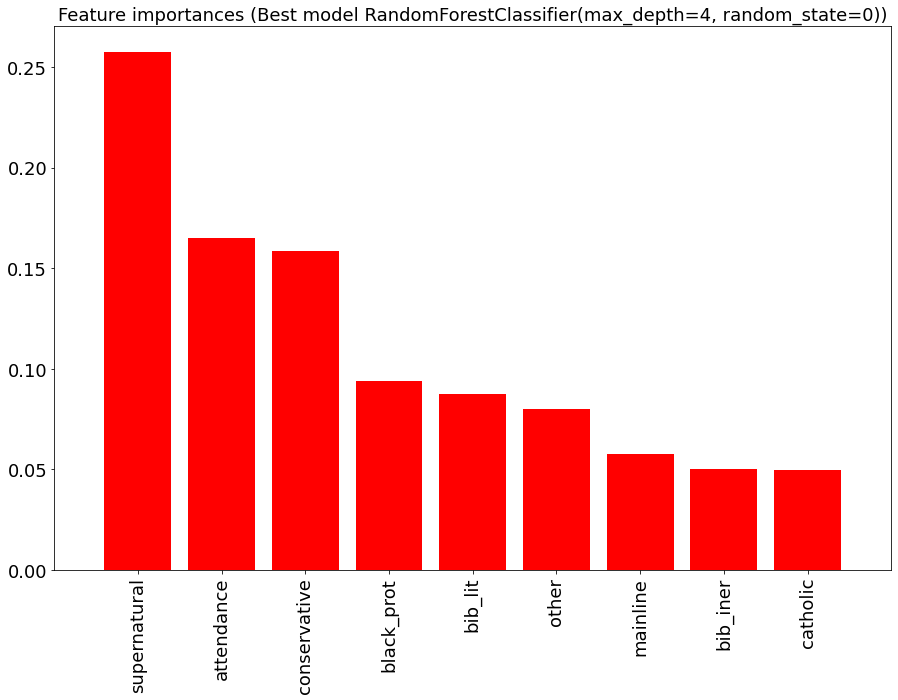

In [29]:
# find best among all models
best_model_religous_only = np.argmax(np.array(model_with_religious_only)[:,1]) 
data = np.array(dataframe.iloc[: , :first_model_independent_number].values)
all_importances = []
for i in range(len(ALL_DEPENDENT)):   
        y_target = np.array(dataframe[ALL_DEPENDENT[i]].values)
        y_target = y_target.round(0)
        # now let's find feature importances per dependent      
        MODELS[best_model_religous_only].fit(data,y_target)
        
        # case BaggingClassifier
        if best_model_religous_only == 2:
            importances = MODELS[best_model_religous_only].estimators_[0].feature_importances_
        else:
            importances = MODELS[best_model_religous_only].feature_importances_
            
        all_importances.append(importances)

# get the mean from all importnaces and store it to final_religious_importance variable
final_religious_importance = np.array(all_importances).mean(axis=0)
indices = np.argsort(final_religious_importance)[::-1]

# and plot the result
plt.figure(figsize=(15, 10))
plt.title(f"Feature importances (Best model {MODELS[best_model_religous_only]})",fontsize=18)
plt.bar(range(first_model_independent_number), final_religious_importance[indices],
        tick_label=[dataframe.columns[x] for x in indices],
        color="r", align="center")
plt.xlim([-1, first_model_independent_number])
_,_ = plt.xticks(fontsize=18, rotation=90), plt.yticks(fontsize=18)

<ipython-input-30-eae2c302f792>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  best_model_all_variables = np.argmax(np.array(model_with_all_variables)[:,1])


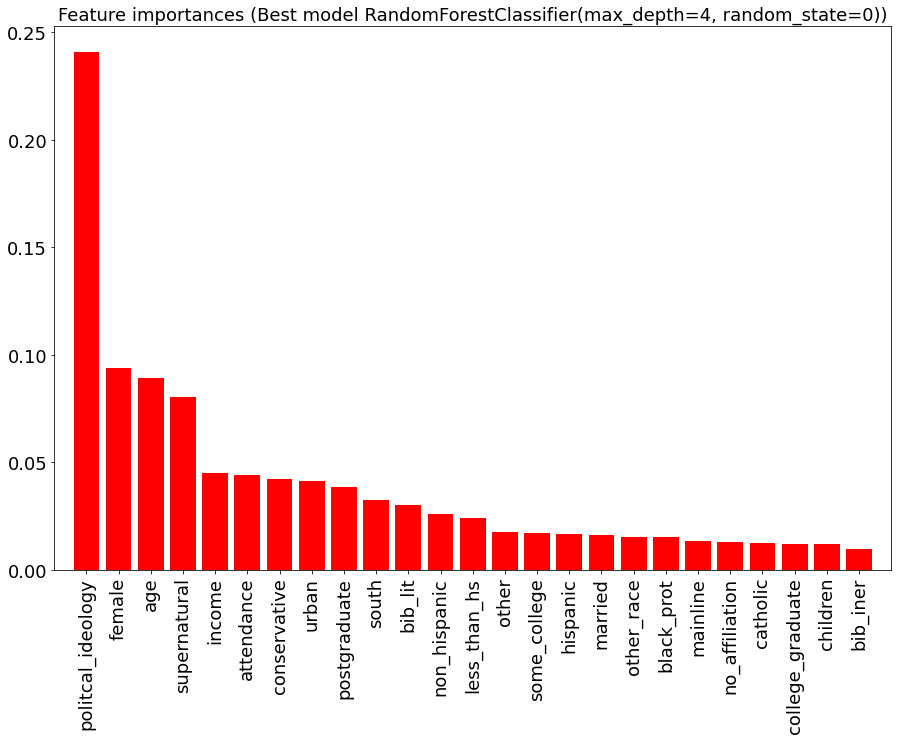

In [30]:
# find best among all models
best_model_all_variables = np.argmax(np.array(model_with_all_variables)[:,1]) 
data = np.array(dataframe.iloc[: , :second_model_independent_number].values)
all_importances = []
for i in range(len(ALL_DEPENDENT)):   
        y_target = np.array(dataframe[ALL_DEPENDENT[i]].values)
        y_target = y_target.round(0)
        # now let's find feature importances per dependent      
        MODELS[best_model_all_variables].fit(data,y_target)
        
        # case BaggingClassifier
        if best_model_religous_only == 2:
            importances = MODELS[best_model_all_variables].estimators_[0].feature_importances_
        else:
            importances = MODELS[best_model_all_variables].feature_importances_
            
        all_importances.append(importances)

# get the mean from all importnaces and store it to final_all_variables_importance variable
final_all_variables_importance = np.array(all_importances).mean(axis=0)
indices = np.argsort(final_all_variables_importance)[::-1]

# and plot the result
plt.figure(figsize=(15, 10))
plt.title(f"Feature importances (Best model {MODELS[best_model_all_variables]})",fontsize=18)
plt.bar(range(second_model_independent_number), final_all_variables_importance[indices],
        tick_label=[dataframe.columns[x] for x in indices],
        color="r", align="center")
plt.xlim([-1, second_model_independent_number])
_,_ = plt.xticks(fontsize=18, rotation=90), plt.yticks(fontsize=18)

### As you observe above from the 2 bar plot graphs, we could see that Supernatural Evil variable plays a foremost role on predictions. It is first from religious variables(only) and top 4 from all independent variables. So we could say that belief in supernatural evil plays an important role on gun policies!

## Top features are: politcal ideology, female,  age, belief in supernatural evil, income!